In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical


TensorFlow 2.x selected.


In [0]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train=X_train/255.0
X_test=X_test/255.0

In [3]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = optimizers.Adam(lr = 0.01) 
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X_train,
          y_train,
          batch_size=100,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 70us/sample - loss: 0.2278 - accuracy: 0.9304 - val_loss: 0.1549 - val_accuracy: 0.9557
Epoch 2/10
48000/48000 [==============================] - 3s 54us/sample - loss: 0.1217 - accuracy: 0.9630 - val_loss: 0.1387 - val_accuracy: 0.9631
Epoch 3/10
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0977 - accuracy: 0.9708 - val_loss: 0.1401 - val_accuracy: 0.9607
Epoch 4/10
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0813 - accuracy: 0.9759 - val_loss: 0.1289 - val_accuracy: 0.9654
Epoch 5/10
48000/48000 [==============================] - 2s 51us/sample - loss: 0.0712 - accuracy: 0.9789 - val_loss: 0.1422 - val_accuracy: 0.9666
Epoch 6/10
48000/48000 [==============================] - 2s 48us/sample - loss: 0.0701 - accuracy: 0.9791 - val_loss: 0.1475 - val_accuracy: 0.9651
Epoch 7/10
48000/48000 [==============================] 

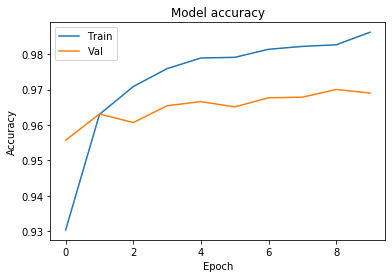

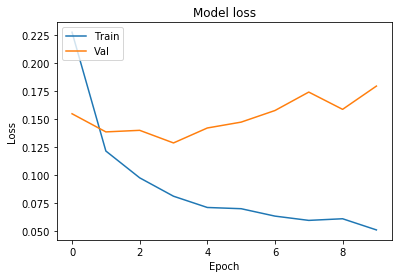

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [9]:
test_loss, test_acc =model.evaluate(X_test,y_test,batch_size=32)
print(test_loss)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================